In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jan 27 2021 12:20:44CET



## Load of the data

In [3]:
from process import loaddata
regr_data = loaddata("../data/regression/250.csv")
class_data = loaddata("../data/classifier/250.csv")

In [4]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [5]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 250828 
Valuation sample: 83610


In [6]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [8]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16, activation = "sigmoid" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [9]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 100 , validation_data = (x_val, y_val) )
model.save("../models/classifier/no-dropout-100.h5")

Epoch 1/20
2509/2509 [==============================] - 10s 4ms/step - loss: 0.5974 - accuracy: 0.6752 - val_loss: 0.3293 - val_accuracy: 0.8745
Epoch 2/20
2509/2509 [==============================] - 9s 3ms/step - loss: 0.3124 - accuracy: 0.8830 - val_loss: 0.2852 - val_accuracy: 0.8930
Epoch 3/20
2509/2509 [==============================] - 8s 3ms/step - loss: 0.2786 - accuracy: 0.8945 - val_loss: 0.2494 - val_accuracy: 0.9080
Epoch 4/20
2509/2509 [==============================] - 9s 4ms/step - loss: 0.2360 - accuracy: 0.9138 - val_loss: 0.2110 - val_accuracy: 0.9273
Epoch 5/20
2509/2509 [==============================] - 7s 3ms/step - loss: 0.2079 - accuracy: 0.9281 - val_loss: 0.1933 - val_accuracy: 0.9359
Epoch 6/20
2509/2509 [==============================] - 5s 2ms/step - loss: 0.1932 - accuracy: 0.9349 - val_loss: 0.1846 - val_accuracy: 0.9379
Epoch 7/20
2509/2509 [==============================] - 10s 4ms/step - loss: 0.1836 - accuracy: 0.9398 - val_loss: 0.1813 - val_accurac

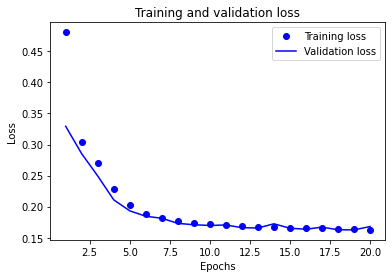

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

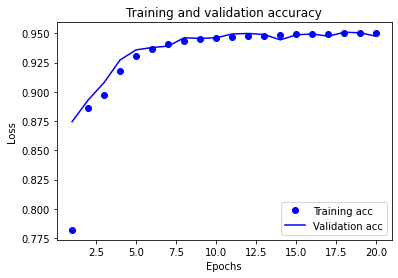

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [17]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 300 , validation_data = (x_val, y_val) )
model.save("../models/classifier/with-dropout-250.h5")

Epoch 1/20
837/837 [==============================] - 5s 5ms/step - loss: 0.5819 - accuracy: 0.6810 - val_loss: 0.2316 - val_accuracy: 0.9209
Epoch 2/20
837/837 [==============================] - 4s 5ms/step - loss: 0.2381 - accuracy: 0.9187 - val_loss: 0.1858 - val_accuracy: 0.9381
Epoch 3/20
837/837 [==============================] - 4s 5ms/step - loss: 0.2029 - accuracy: 0.9325 - val_loss: 0.1725 - val_accuracy: 0.9441
Epoch 4/20
837/837 [==============================] - 4s 5ms/step - loss: 0.1883 - accuracy: 0.9384 - val_loss: 0.1712 - val_accuracy: 0.9471
Epoch 5/20
837/837 [==============================] - 4s 4ms/step - loss: 0.1813 - accuracy: 0.9409 - val_loss: 0.1683 - val_accuracy: 0.9491
Epoch 6/20
837/837 [==============================] - 4s 4ms/step - loss: 0.1764 - accuracy: 0.9426 - val_loss: 0.1644 - val_accuracy: 0.9469
Epoch 7/20
837/837 [==============================] - 4s 5ms/step - loss: 0.1713 - accuracy: 0.9444 - val_loss: 0.1599 - val_accuracy: 0.9490
Epoch 

## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

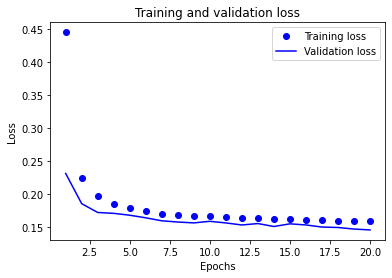

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

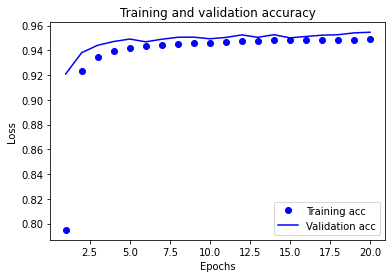

In [21]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()